In [6]:
#loading the required libraries
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [11]:
#will use the housing dataset for california
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
x, y = housing.data, housing.target
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

In [7]:
#defining ad fitting the model
#we define it with its default parameters
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(verbosity=0)


In [8]:
#fit the model with xgbr
xgbr.fit(xtrain, ytrain)

XGBRegressor(verbosity=0)

In [12]:
#check the score
score = xgbr.score(xtrain, ytrain)  
print("Training score: ", score)

Training score:  0.8027702171948113


In [13]:
#Apply the cross-validation method to evaluate the training score
scores = cross_val_score(xgbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.79


In [14]:
#Apply KFlold method in cross-validation
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())


K-fold CV average score: 0.79


Means both the prediction has an avarage of 79%


In [15]:
#Lets predict the test data for accuracy
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)

MSE: 0.29


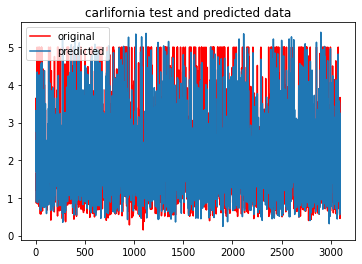

In [25]:
#visualizing the data test and predicted
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, color='red', label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("carlifornia test and predicted data")
plt.legend()
plt.show()

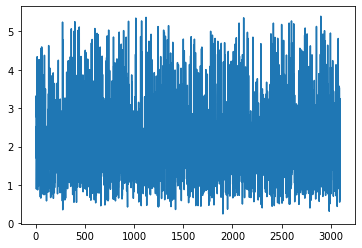

In [23]:
plt.plot(x_ax, ypred, label="predicted")